In [1553]:
import pandas as pd

In [1554]:
data = pd.read_csv('ml_dataset.csv')

In [1555]:
data.head()

,Country,Instrument,Decade,Mood,Topic,Band
0,United States,Guitar,80,Angry,Religion,Slayer
1,Germany,Drums,90,Energetic,History,Kreator
2,England,Guitar,80,Reflective,History,Iron Maiden
3,France,Guitar,0,Angry,Other,Gojira
4,United States,Drums,10,Energetic,Politics,Slayer


In [1556]:
data.shape

(40, 6)

In [1557]:
data['Country'].replace(['United States', 'England', 'Germany', 'France'], [0, 1, 2, 3], inplace=True)
data['Instrument'].replace(['Guitar', 'Bass', 'Drums'], [0, 1, 2], inplace=True)
data['Mood'].replace(['Reflective', 'Relaxed', 'Angry', 'Energetic'], [0, 1, 2, 3], inplace=True)
data['Topic'].replace(['War', 'Politics', 'Religion', 'History', 'Other'], [0, 1, 2, 3, 4], inplace=True)

In [1558]:
data.head()

,Country,Instrument,Decade,Mood,Topic,Band
0,0,0,80,2,2,Slayer
1,2,2,90,3,3,Kreator
2,1,0,80,0,3,Iron Maiden
3,3,0,0,2,4,Gojira
4,0,2,10,3,1,Slayer


In [1559]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [1560]:
y = data.drop(columns=['Country', 'Instrument', 'Decade', 'Mood', 'Topic'])

In [1561]:
y.head()

,Band
0,Slayer
1,Kreator
2,Iron Maiden
3,Gojira
4,Slayer


In [1562]:
X = data.drop(columns='Band')
X.head()

,Country,Instrument,Decade,Mood,Topic
0,0,0,80,2,2
1,2,2,90,3,3
2,1,0,80,0,3
3,3,0,0,2,4
4,0,2,10,3,1


In [1563]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [1564]:
clf = DecisionTreeClassifier()

In [1565]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [1566]:
test = clf.predict(X_test)

In [1567]:
test

array(['Kreator', 'Iron Maiden', 'Gojira', 'Slayer', 'Kreator',
       'Iron Maiden', 'Kreator', 'Slayer', 'Kreator', 'Dream Theater',
       'Slayer', 'Dream Theater'], dtype=object)

In [1568]:
y_test

,Band
24,Kreator
22,Iron Maiden
13,Gojira
23,Metallica
39,Kreator
36,Iron Maiden
25,Kreator
17,Slayer
38,Kreator
37,Dream Theater


In [1569]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, test)
accuracy

0.8333333333333334

In [1571]:
import joblib

In [1572]:
joblib.dump(clf, 'ml_dataset_bands.joblib')

['ml_dataset_bands.joblib']

In [1573]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

c_matrix = confusion_matrix(y_test, test)
c_matrix

array([[2, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0],
       [0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 1]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


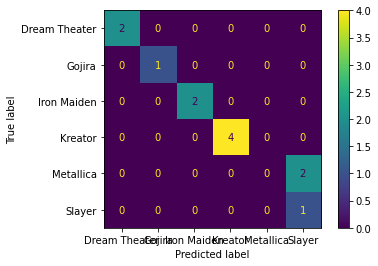

In [1575]:
plot_confusion_matrix(clf, X_test, y_test)

In [1576]:
y_test

,Band
24,Kreator
22,Iron Maiden
13,Gojira
23,Metallica
39,Kreator
36,Iron Maiden
25,Kreator
17,Slayer
38,Kreator
37,Dream Theater


In [1577]:
print(classification_report(y_test, test))

               precision    recall  f1-score   support

Dream Theater       1.00      1.00      1.00         2
       Gojira       1.00      1.00      1.00         1
  Iron Maiden       1.00      1.00      1.00         2
      Kreator       1.00      1.00      1.00         4
    Metallica       0.00      0.00      0.00         2
       Slayer       0.33      1.00      0.50         1

     accuracy                           0.83        12
    macro avg       0.72      0.83      0.75        12
 weighted avg       0.78      0.83      0.79        12



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
